# Resumo

### Fórmulas Matemáticas

### 1. **Primeira Fórmula:**  
### $$ \text{peso} = a \cdot (\text{length}^b) \cdot (\text{volume}^c) $$  
### Onde:  
### - \( a = 0.12121 \)  
### - \( b = 0.1399 \)  
### - \( c = 0.4 \)  
### 
### 2. **Segunda Fórmula:**  
### $$ \text{peso} = (\text{length} - 5) \times 2.8 $$


### Matriz

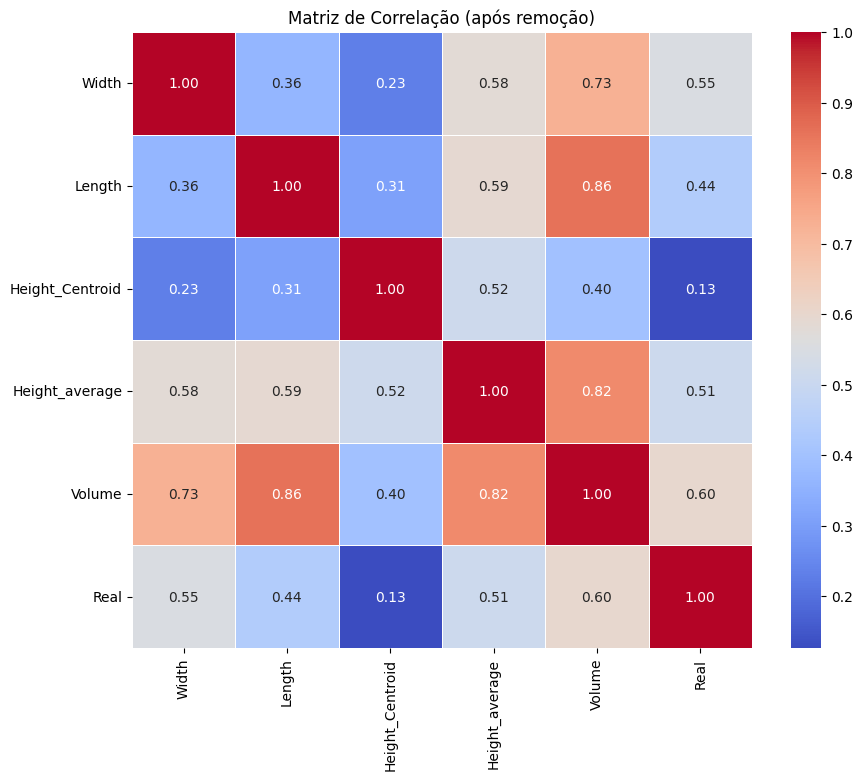

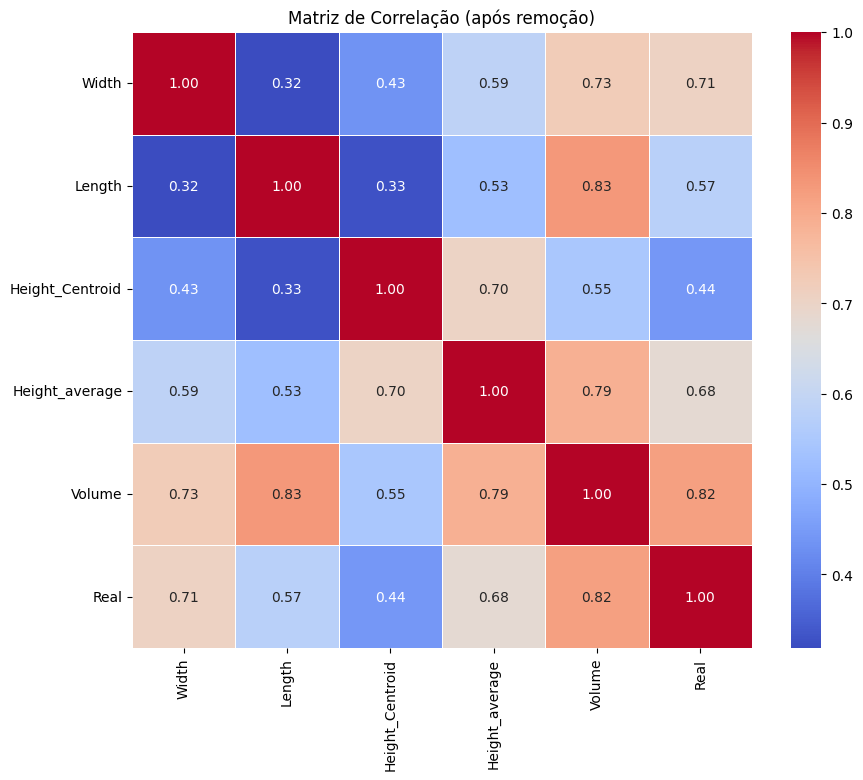

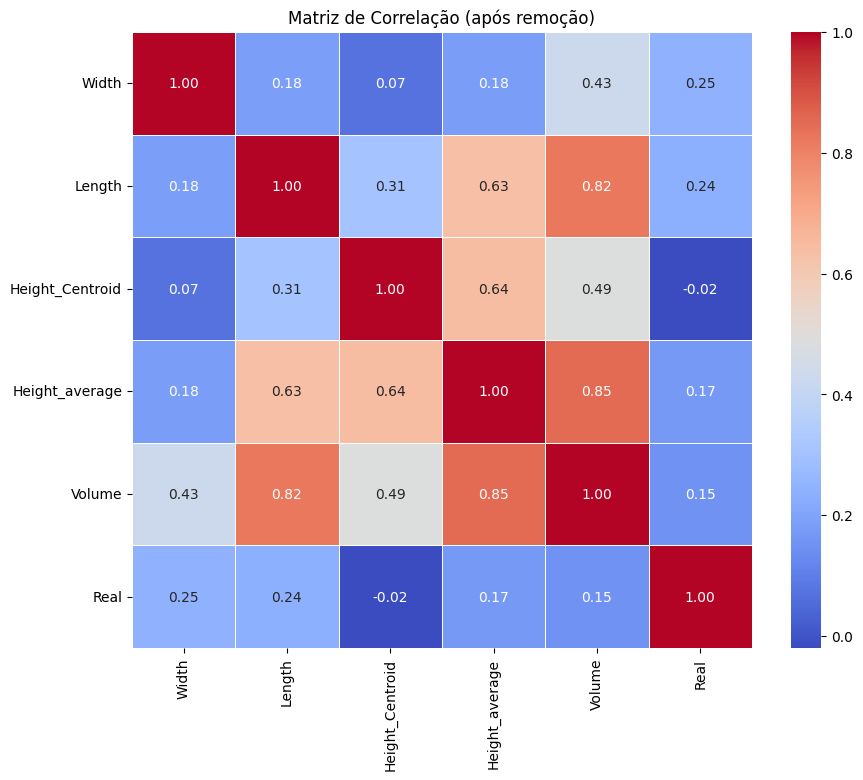

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/juntos.csv")
df_reduzido = df.drop(columns=['Animal', 'ID', 'Frame'])
corr = df_reduzido.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Matriz de Correlação (após remoção)')
plt.show()


df = pd.read_csv("datasets/regression.csv")
df_reduzido = df.drop(columns=['Animal', 'ID', 'Frame'])
corr = df_reduzido.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Matriz de Correlação (após remoção)')
plt.show()

df = pd.read_csv("datasets/mydataset.csv")
df_reduzido = df.drop(columns=['Animal', 'ID', 'Frame'])
corr = df_reduzido.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Matriz de Correlação (após remoção)')
plt.show()

### Fórmula 1

In [2]:
import pandas as pd
#a=0.12121, b=0.1399, c=0.4

def calcular_peso(length, volume, a=0.12121, b=0.1399, c=0.4):
    return a * (length ** b) * (volume ** c)

df_1 = pd.read_csv('datasets/mydataset.csv')  
df_1['Peso_estimado'] = df_1.apply(lambda row: calcular_peso(row['Length'], row['Volume']), axis=1)

df_1.to_csv('dataset_formulas/f1_dados_com_peso_estimado_my_dataset.csv', index=False)



df_2 = pd.read_csv('datasets/regression.csv')  
df_2['Peso_estimado'] = df_2.apply(lambda row: calcular_peso(row['Length'], row['Volume']), axis=1)

df_2.to_csv('dataset_formulas/f1_dados_com_peso_estimado_regression.csv', index=False)


### Fórmula 2

In [3]:
import pandas as pd

def calcular_peso(length):
    return (length - 5)* 2.8  # vai depender da segmentação do modelo

df_1 = pd.read_csv('datasets/mydataset.csv')  
df_1['Peso_estimado'] = df_1['Width'].apply(calcular_peso)
df_1.to_csv('dataset_formulas/f2_dados_com_peso_estimado_my_dataset.csv', index=False)


df_2 = pd.read_csv('datasets/regression.csv')  
df_2['Peso_estimado'] = df_2['Width'].apply(calcular_peso)
df_2.to_csv('dataset_formulas/f2_dados_com_peso_estimado_regression.csv', index=False)

### Comparação Dataset Criado e Dataset regression.csv

In [4]:
import pandas as pd

def calcular_metricas(caminho_csv):
    df = pd.read_csv(caminho_csv)
    df['peso_diferenca'] = abs(df['Real'] - df['Peso_estimado'])
    
    # CONSIDERAR OUTLIER COMO DIFERENÇA DE PESO MAIOR QUE 200
    limite = 200 
    
    outliers = df[df['peso_diferenca'] > limite]
    df_sem_outliers = df[df['peso_diferenca'] <= limite].copy()  
    
    mae = df_sem_outliers['peso_diferenca'].mean()
    df_sem_outliers.loc[:, 'erro_percentual'] = (df_sem_outliers['peso_diferenca'] / df_sem_outliers['Real']) * 100  # Usando .loc para evitar warning
    mape = df_sem_outliers['erro_percentual'].mean()
    
    erro_medio = (df_sem_outliers['Peso_estimado'] - df_sem_outliers['Real']).mean()
    return mae, mape, erro_medio, outliers[['Animal', 'ID', 'Frame', 'Real', 'Peso_estimado', 'peso_diferenca']]

caminho_csv = "dataset_formulas/f1_dados_com_peso_estimado_my_dataset.csv"

mae, mape, erro_medio, outliers = calcular_metricas(caminho_csv)

print("MY DATASET")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Médio Percentual (MAPE): {mape}%")
print(f"Erro Médio (ME): {erro_medio}")
print("Outliers encontrados MYDATASET:")
print(outliers)


print()
caminho_csv = "dataset_formulas/f1_dados_com_peso_estimado_regression.csv"

mae, mape, erro_medio, outliers = calcular_metricas(caminho_csv)
print("REGRESSION")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Médio Percentual (MAPE): {mape}%")
print(f"Erro Médio (ME): {erro_medio}")
print("Outliers encontrados REGRESSION:")
print(outliers)

MY DATASET
Erro Médio Absoluto (MAE): 21.10768314638438
Erro Médio Percentual (MAPE): 6.261767863803957%
Erro Médio (ME): 15.207887632813755
Outliers encontrados MYDATASET:
    Animal          ID  Frame  Real  Peso_estimado  peso_diferenca
12       8  1734629331      0  1077     361.740586      715.259414
13       8  1734629331      1  1077     368.418388      708.581612
14       8  1734629331      2  1077     370.958351      706.041649
15       8  1734629331      3  1077     364.418388      712.581612
16       8  1734629331      4  1077     361.352399      715.647601
17       8  1734629331      5  1077     358.388568      718.611432
18       8  1734629331      6  1077     364.328172      712.671828
74      24  1734629924      0     0     333.222251      333.222251
75      24  1734629924      1     0     334.575615      334.575615
76      24  1734629924      2     0     337.065162      337.065162
77      24  1734629924      3     0     344.904353      344.904353
78      24  1734629924 

In [5]:
import pandas as pd

def calcular_metricas(caminho_csv):
    df = pd.read_csv(caminho_csv)
    df['peso_diferenca'] = abs(df['Real'] - df['Peso_estimado'])
    
    # CONSIDERAR OUTLIER COMO DIFERENÇA DE PESO MAIOR QUE 200
    limite = 200 
    
    outliers = df[df['peso_diferenca'] > limite]
    df_sem_outliers = df[df['peso_diferenca'] <= limite].copy()  
    
    mae = df_sem_outliers['peso_diferenca'].mean()
    df_sem_outliers.loc[:, 'erro_percentual'] = (df_sem_outliers['peso_diferenca'] / df_sem_outliers['Real']) * 100  # Usando .loc para evitar warning
    mape = df_sem_outliers['erro_percentual'].mean()
    
    erro_medio = (df_sem_outliers['Peso_estimado'] - df_sem_outliers['Real']).mean()
    return mae, mape, erro_medio, outliers[['Animal', 'ID', 'Frame', 'Real', 'Peso_estimado', 'peso_diferenca']]

caminho_csv = "dataset_formulas/f2_dados_com_peso_estimado_my_dataset.csv"

mae, mape, erro_medio, outliers = calcular_metricas(caminho_csv)

print("MY DATASET")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Médio Percentual (MAPE): {mape}%")
print(f"Erro Médio (ME): {erro_medio}")
print("Outliers encontrados MYDATASET:")
print(outliers)


print()
caminho_csv = "dataset_formulas/f2_dados_com_peso_estimado_regression.csv"

mae, mape, erro_medio, outliers = calcular_metricas(caminho_csv)
print("REGRESSION")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Médio Percentual (MAPE): {mape}%")
print(f"Erro Médio (ME): {erro_medio}")
print("Outliers encontrados REGRESSION:")
print(outliers)

MY DATASET
Erro Médio Absoluto (MAE): 31.932611722742145
Erro Médio Percentual (MAPE): 9.460033424974112%
Erro Médio (ME): 29.38673991960151
Outliers encontrados MYDATASET:
    Animal          ID  Frame  Real  Peso_estimado  peso_diferenca
12       8  1734629331      0  1077     406.000000      671.000000
13       8  1734629331      1  1077     406.009333      670.990667
14       8  1734629331      2  1077     411.572368      665.427632
15       8  1734629331      3  1077     414.555527      662.444473
16       8  1734629331      4  1077     385.223446      691.776554
17       8  1734629331      5  1077     381.950098      695.049902
18       8  1734629331      6  1077     385.154707      691.845293
74      24  1734629924      0     0     383.600000      383.600000
75      24  1734629924      1     0     378.000000      378.000000
76      24  1734629924      2     0     378.000000      378.000000
77      24  1734629924      3     0     378.000000      378.000000
78      24  1734629924 